#  Question 1

##  PCA

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [318]:
data = pd.read_csv("wine.csv")
data1 = data.drop(["Type"],axis=1)
data1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [319]:
data2 = data1.values
data2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

##  Standardizing the dataset 

In [320]:
wine = scale(data2)
wine

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [350]:
wine.shape

(178, 13)

##  PCA

In [321]:
pca = PCA(n_components=12)
pca_values = pca.fit_transform(wine)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         1.02095585e+00, -4.51563395e-01,  5.40810414e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.59701372e-01, -1.42657306e-01,  3.88237741e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
         1.13360857e-01, -2.86672847e-01,  5.83573183e-04],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
        -2.47997312e-01,  5.12492025e-01,  6.98766451e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         4.91489502e-01,  2.99821968e-01,  3.39820654e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -1.17969019e-01, -2.29964331e-01, -1.88787963e-01]])

In [322]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [323]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233])

In [324]:
var1 = np.cumsum(np.round(var, decimals= 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34, 92.02, 94.24,
       96.17, 97.91, 99.21])

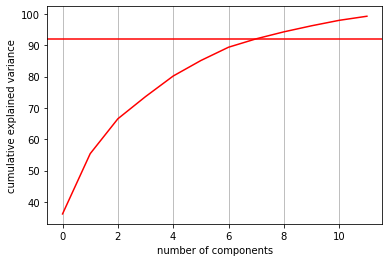

In [325]:
fig, ax = plt.subplots()
plt.plot(var1, color= "red",)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=92, color='r', linestyle='-')
ax.grid(axis='x')
plt.show()

In [326]:
pca_values[:,0:9]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         5.96426546e-01,  6.51390947e-02,  6.41442706e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         5.37756128e-02,  1.02441595e+00, -3.08846753e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
         4.24205451e-01, -3.44216131e-01, -1.17783447e+00],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         6.79235406e-01,  4.70238043e-02,  1.22214687e-03],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         6.33975271e-01,  3.90828774e-01,  5.74476725e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
         5.74125710e-03, -2.92913734e-01,  7.41660423e-01]])

## PCA Scores 

In [327]:
wine_new = pd.concat([pd.DataFrame(pca_values[:,0:9], columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']),
                 data["Type"]],axis=1)
pd.set_option("display.max.rows",None)
wine_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,1
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,1
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,1
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,1
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,1


## 2D Visualization 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

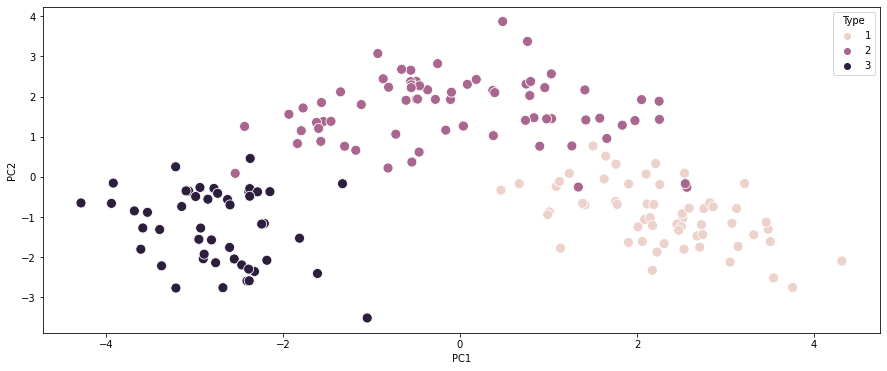

In [328]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=wine_new,x='PC1',y='PC2',hue='Type',s = 100)

##      Hierarchical Clustering using PCA

In [329]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [330]:
wine_hie = wine_new.iloc[:,0:3]
wine_hie

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
5,3.050254,-2.122401,-0.629396
6,2.449090,-1.174850,-0.977095
7,2.059437,-1.608963,0.146282
8,2.510874,-0.918071,-1.770969
9,2.753628,-0.789438,-0.984247


##   Optimal number of clusters using dendogram by complete linkage method

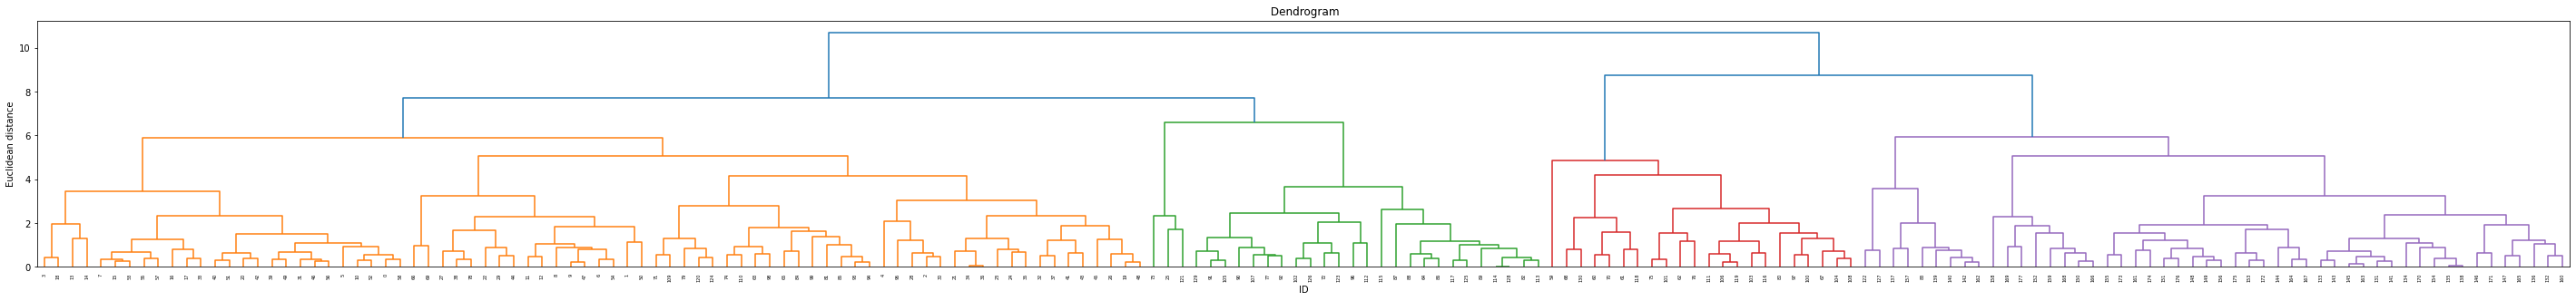

In [331]:
hie = linkage(wine_hie, method = "complete", metric= "euclidean")
plt.figure(figsize=(50,5))
plt.title(" Dendrogram")
plt.xlabel("ID")
plt.ylabel("Euclidean distance")
sch.dendrogram(hie)
plt.show()

##  Hierarchical Clustering model

In [332]:
hc = AgglomerativeClustering(n_clusters=3 , affinity="euclidean", linkage="complete" ).fit(wine_hie)
cluster_labels=pd.Series(hc.labels_)
cluster_labels
wine_hie['cluster']=cluster_labels
wine_hie

,PC1,PC2,PC3,cluster
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
5,3.050254,-2.122401,-0.629396,0
6,2.449090,-1.174850,-0.977095,0
7,2.059437,-1.608963,0.146282,0
8,2.510874,-0.918071,-1.770969,0
9,2.753628,-0.789438,-0.984247,0


In [333]:
wine_hie.iloc[:,0:3].groupby(wine_hie.cluster).mean()

,PC1,PC2,PC3
cluster,,,
0,1.379516,0.140081,0.252432
1,-2.717994,-1.149057,-0.022672
2,-0.469499,1.936559,-1.164734


##  Visualizing the cluster

Text(0.5, 1.0, 'Clusters using H-Clustering')

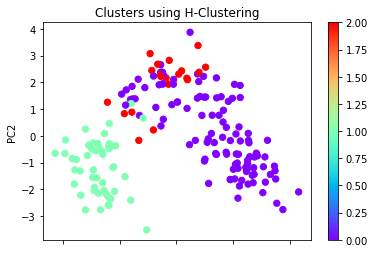

In [334]:
wine_hie.plot(x="PC1",y ="PC2",c=hc.labels_, kind="scatter",s=40 ,cmap="rainbow") 
plt.title('Clusters using H-Clustering')

Text(0.5, 1.0, 'Clusters using H-Clustering')

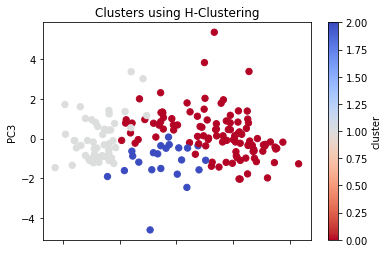

In [335]:
wine_hie.plot(x="PC1",y ="PC3",c="cluster", kind="scatter",s=40 ,cmap=plt.cm.coolwarm_r) 
plt.title('Clusters using H-Clustering')

Text(0.5, 1.0, 'Clusters using H-Clustering')

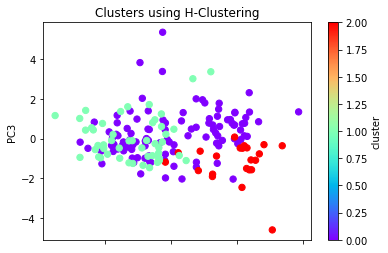

In [336]:
wine_hie.plot(x="PC2",y ="PC3",c="cluster", kind="scatter",s=40 ,cmap="rainbow") 
plt.title('Clusters using H-Clustering')

##     KMeans Clustering using PCA

In [337]:
from sklearn.cluster import KMeans

In [338]:
wine_km = wine_new.iloc[:,0:3]
wine_km

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
5,3.050254,-2.122401,-0.629396
6,2.449090,-1.174850,-0.977095
7,2.059437,-1.608963,0.146282
8,2.510874,-0.918071,-1.770969
9,2.753628,-0.789438,-0.984247


##  Optimal number of clusters using the elbow method

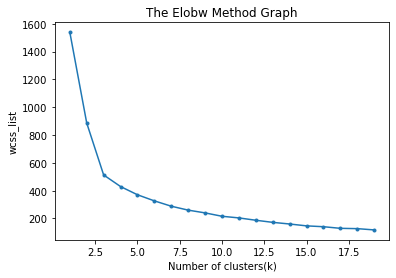

In [342]:
wcss_list= []
for i in range(1, 20):  
    kvalue = KMeans(n_clusters=i)  
    kvalue.fit(wine_km)  
    wcss_list.append(kvalue.inertia_)  
plt.plot(range(1, 20), wcss_list, marker = ".") 
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

##  KMeans Clustering model

In [343]:
values = KMeans(n_clusters=3)  
y_predict= values.fit_predict(wine_km)  
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [344]:
new_c=pd.Series(y_predict)  
wine_km['cluster'] =  new_c
wine_km

,PC1,PC2,PC3,cluster
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
5,3.050254,-2.122401,-0.629396,0
6,2.449090,-1.174850,-0.977095,0
7,2.059437,-1.608963,0.146282,0
8,2.510874,-0.918071,-1.770969,0
9,2.753628,-0.789438,-0.984247,0


In [345]:
wine_km.iloc[:,0:3].groupby(wine_km.cluster).mean()

,PC1,PC2,PC3
cluster,,,
0,2.275808,-0.894518,-0.002150
1,-0.072720,1.777544,0.192644
2,-2.720036,-1.125651,-0.239093


##  Visualization of cluster 

Text(0.5, 1.0, 'Clusters using KMeans')

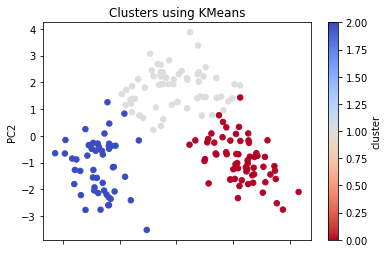

In [346]:
wine_km.plot(x="PC1",y ="PC2",c="cluster",kind="scatter",s=30 ,cmap=plt.cm.coolwarm_r) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

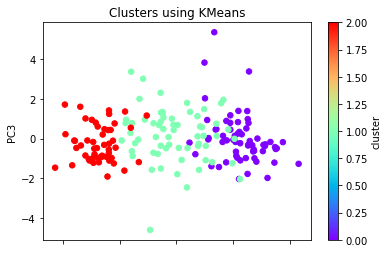

In [347]:
wine_km.plot(x="PC1",y ="PC3",c="cluster",kind="scatter",s=30 ,cmap="rainbow") 
plt.title('Clusters using KMeans')

##  Hierarchical clustering on original dataset wine 

In [373]:
wine_1 = pd.DataFrame(wine)
wine_1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [374]:
wine_2 = wine_1.copy()

In [367]:
wine_1.shape

(178, 13)

##   Optimal number of clusters using dendogram by complete linkage method

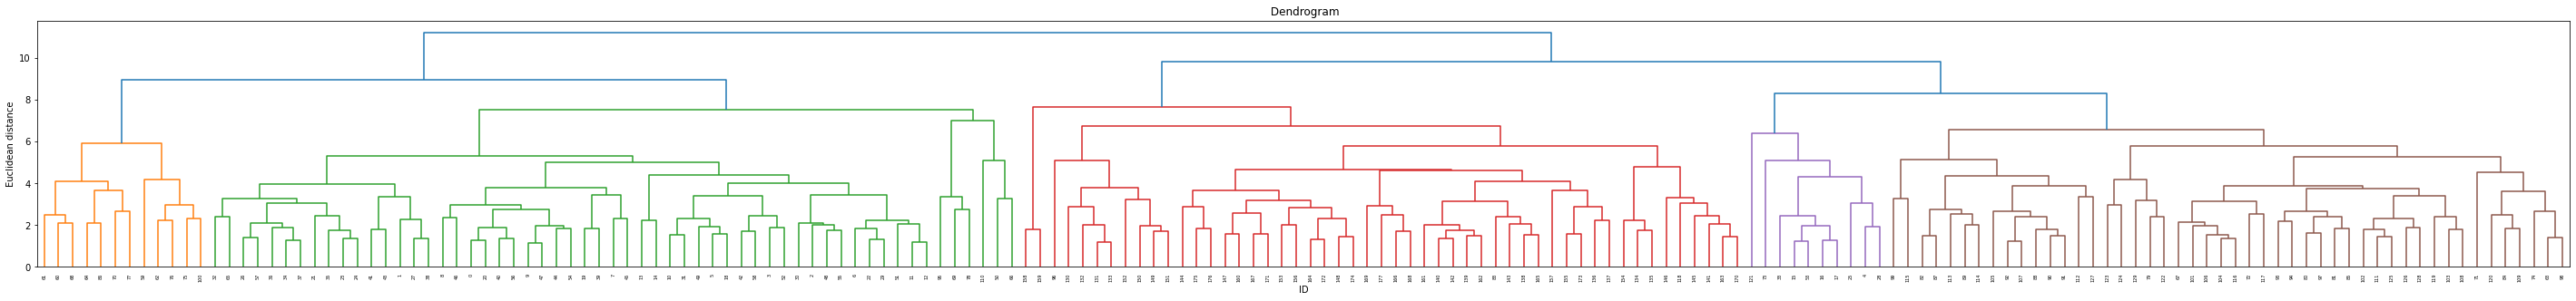

In [368]:
hie = linkage(wine_1, method = "complete", metric= "euclidean")
plt.figure(figsize=(50,5))
plt.title(" Dendrogram")
plt.xlabel("ID")
plt.ylabel("Euclidean distance")
sch.dendrogram(hie)
plt.show()


##  Hierarchical Clustering model

In [369]:
hc = AgglomerativeClustering(n_clusters=3 , affinity="euclidean", linkage="complete" ).fit(wine_1)
cluster_labels=pd.Series(hc.labels_)
cluster_labels
wine_1['cluster']=cluster_labels
wine_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,0
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,0
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,0
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,0
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,0


In [370]:
wine_1.iloc[:,0:3].groupby(wine_1.cluster).mean()

,0,1,2
cluster,,,
0,0.500862,-0.392604,-0.221951
1,-0.723180,-0.311059,0.054327
2,0.144804,0.884924,0.238503


###   Hence, the hierarchical clustering using PCA and the hierarchical clustering using original dataset wine has same optimum number of cluster i.e 3  

##   KMeans clustering using original dataset 

In [375]:
wine_2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


##  Optimal number of clusters using the elbow method

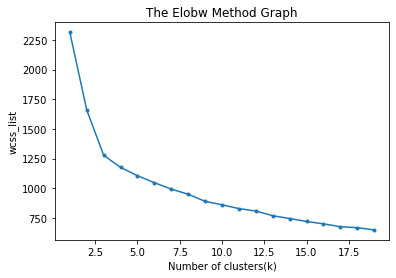

In [376]:
wcss_list= []
for i in range(1, 20):  
    kvalue = KMeans(n_clusters=i)  
    kvalue.fit(wine_2)  
    wcss_list.append(kvalue.inertia_)  
plt.plot(range(1, 20), wcss_list, marker = ".") 
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

##  KMeans Clustering model

In [378]:
value = KMeans(n_clusters=3)  
y_pred= value.fit_predict(wine_2)  
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [380]:
newc=pd.Series(y_pred)  
wine_2['cluster'] =  newc
wine_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,2
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,2
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,2
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,2
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,2


In [382]:
wine_2.iloc[:,0:3].groupby(wine_2.cluster).mean()

,0,1,2
cluster,,,
0,-0.926072,-0.394042,-0.494517
1,0.164907,0.871547,0.186898
2,0.835232,-0.303810,0.364706


###   Hence, the KMeans clustering using PCA and the KMeans clustering using original dataset wine has same optimum number of cluster i.e 3  